## Simply Query

In [7]:
from pymongo import MongoClient

# Connect to MongoDB
client = MongoClient('mongodb://127.0.0.1:27017/')

In [8]:
# Create or access a database
mydb = client['employee']

# Create or access a collection
information = mydb['employeeinformation']

# Insert sample data (as a single document, not a list)
employee_data = [
    {"name": "Alice", "age": 25, "city": "New York"},
    {"name": "Bob", "age": 30, "city": "San Francisco"},
    {"name": "Charlie", "age": 35, "city": "Los Angeles"},
    {"name": "David", "age": 40, "city": "Chicago"},
    {"name": "Eve", "age": 28, "city": "Seattle"}
]

# Use insert_one to insert the document
information.insert_many(employee_data)

InsertManyResult([ObjectId('684d5f2f633de758b0deeff6'), ObjectId('684d5f2f633de758b0deeff7'), ObjectId('684d5f2f633de758b0deeff8'), ObjectId('684d5f2f633de758b0deeff9'), ObjectId('684d5f2f633de758b0deeffa')], acknowledged=True)

## Seleting top one record

In [9]:
information.find_one()

{'_id': ObjectId('684d5f2f633de758b0deeff6'),
 'name': 'Alice',
 'age': 25,
 'city': 'New York'}

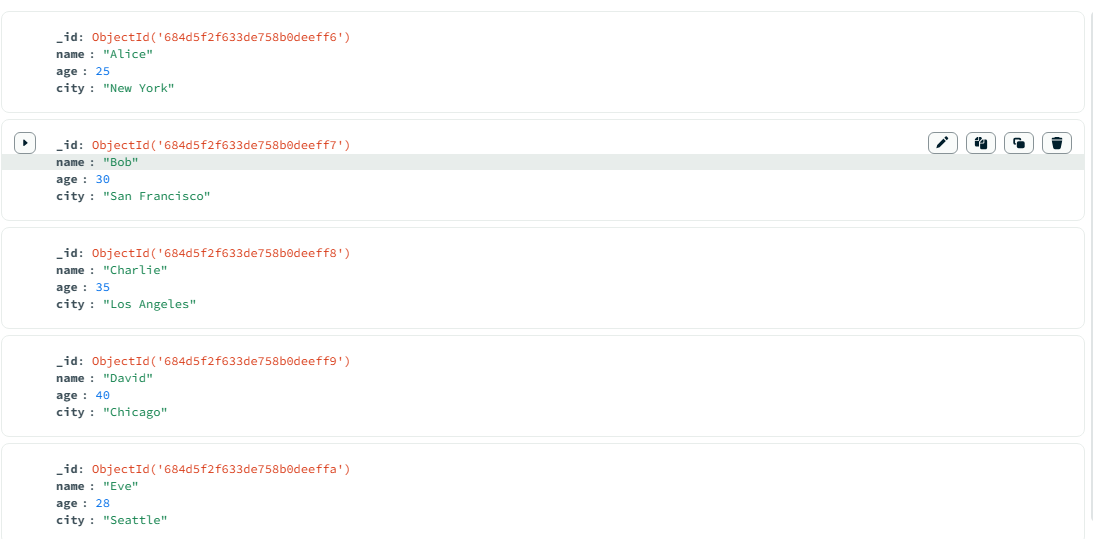

## Select all the information from Employee Information

In [13]:
# This will provide cursor response 

information.find()

In [16]:
# This will get you all the records

for employee_data in information.find({}):
    print(employee_data)

{'_id': ObjectId('684d5f2f633de758b0deeff6'), 'name': 'Alice', 'age': 25, 'city': 'New York'}
{'_id': ObjectId('684d5f2f633de758b0deeff7'), 'name': 'Bob', 'age': 30, 'city': 'San Francisco'}
{'_id': ObjectId('684d5f2f633de758b0deeff8'), 'name': 'Charlie', 'age': 35, 'city': 'Los Angeles'}
{'_id': ObjectId('684d5f2f633de758b0deeff9'), 'name': 'David', 'age': 40, 'city': 'Chicago'}
{'_id': ObjectId('684d5f2f633de758b0deeffa'), 'name': 'Eve', 'age': 28, 'city': 'Seattle'}


## Query JSON doc based on equality conditions

In [19]:
# Query on the base of name

for employee_data in information.find({'name':'Alice'}):
    print(employee_data)

{'_id': ObjectId('684d5f2f633de758b0deeff6'), 'name': 'Alice', 'age': 25, 'city': 'New York'}


In [21]:
# Query on the base of age

for employee_data in information.find({'age':30}):
    print(employee_data)

{'_id': ObjectId('684d5f2f633de758b0deeff7'), 'name': 'Bob', 'age': 30, 'city': 'San Francisco'}


## Query Operators

### $in ,$lt ,$gt

#### $in

In [ ]:
# Query on the base of more than one city

for employee_data in information.find({'city':{'$in':['Chicago', 'Seattle']}}):
    print(employee_data)

{'_id': ObjectId('684d5f2f633de758b0deeff9'), 'name': 'David', 'age': 40, 'city': 'Chicago'}
{'_id': ObjectId('684d5f2f633de758b0deeffa'), 'name': 'Eve', 'age': 28, 'city': 'Seattle'}


### $lt

In [31]:
# Query using $lt operators age less than 35

for employee_data in information.find({'age':{'$lt':35}}):
    print(employee_data)

{'_id': ObjectId('684d5f2f633de758b0deeff6'), 'name': 'Alice', 'age': 25, 'city': 'New York'}
{'_id': ObjectId('684d5f2f633de758b0deeff7'), 'name': 'Bob', 'age': 30, 'city': 'San Francisco'}
{'_id': ObjectId('684d5f2f633de758b0deeffa'), 'name': 'Eve', 'age': 28, 'city': 'Seattle'}


### Quary using AND

In [32]:
for employee_data in information.find({'city':'New York', 'age': 25}):
    print(employee_data)

{'_id': ObjectId('684d5f2f633de758b0deeff6'), 'name': 'Alice', 'age': 25, 'city': 'New York'}


### Quary using AND and Query operators

In [33]:
# Query on the base of city and age less than 35

for employee_data in information.find({'city':'San Francisco', 'age':{'$lt':35}}):
    print(employee_data)

{'_id': ObjectId('684d5f2f633de758b0deeff7'), 'name': 'Bob', 'age': 30, 'city': 'San Francisco'}


In [36]:
for employee_data in information.find({'$and':[{'age': 28}, {'name': 'Eve'}]}):
    print(employee_data)

{'_id': ObjectId('684d5f2f633de758b0deeffa'), 'name': 'Eve', 'age': 28, 'city': 'Seattle'}


### OR Operators

In [37]:
for employee_data in information.find({'$or':[{'age': 35}, {'name': 'Bob'}]}):
    print(employee_data)

{'_id': ObjectId('684d5f2f633de758b0deeff7'), 'name': 'Bob', 'age': 30, 'city': 'San Francisco'}
{'_id': ObjectId('684d5f2f633de758b0deeff8'), 'name': 'Charlie', 'age': 35, 'city': 'Los Angeles'}
